In [27]:
import pandas as pd

In [28]:
df = pd.read_csv('Preprocessed_2.csv')
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1.0,22.0,1,0,2.0,2.0
1,2,1,1,0.0,38.0,1,0,0.0,0.0
2,3,1,3,0.0,26.0,0,0,2.0,2.0
3,4,1,1,0.0,35.0,1,0,2.0,2.0
4,5,0,3,1.0,35.0,0,0,2.0,2.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1.0,27.0,0,0,2.0,2.0
887,888,1,1,0.0,19.0,0,0,2.0,2.0
888,889,0,3,0.0,24.0,1,2,2.0,2.0
889,890,1,1,1.0,26.0,0,0,0.0,0.0


In [29]:
X = df.drop(['Survived'], axis='columns')
y = df.Survived


In [30]:
X.shape
y.shape

(891,)

In [31]:
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV


In [32]:
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, random_state = 0)

In [33]:
X_train.shape

(712, 8)

In [34]:
model = RandomForestClassifier(n_estimators = 100, max_samples = 0.3, max_depth = 10)

model.fit(X_train, y_train)

y_pre = model.predict(X_test)

In [35]:
a = accuracy_score(y_pre, y_test)
p = precision_score(y_pre, y_test)
r = recall_score(y_pre, y_test)
f = f1_score(y_pre, y_test)
auc_score = roc_auc_score(y_pre, y_test)

print(a, p, r, f, auc_score)

from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=0)
feature_importance = pd.DataFrame({'Feature': X_test.columns, 'Importance': perm_importance.importances_mean})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance)


0.8268156424581006 0.6956521739130435 0.8275862068965517 0.7559055118110236 0.8270162439441435
Feature Importance:
       Feature  Importance
2          Sex    0.204655
1       Pclass    0.048045
5        Parch    0.013035
3          Age    0.012849
4        SibSp    0.011173
0  PassengerId    0.000745
6         Fare   -0.000372
7     Embarked   -0.002980


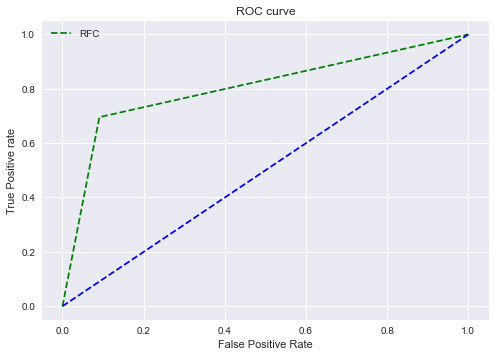

In [36]:
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pre, pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


# plt.style.use('seaborn')
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='green', label='RFC')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')

plt.show()

In [37]:
n_est = [200,300,400,500,750,1000,1500]

m_depth = [10,20,30,40,50,60,70]

m_sam = [0.2,0.3,0.4,0.5,0.6,0.7,0.8]



random_grid = {'n_estimators': n_est,
               'max_depth': m_depth,
               'max_samples': m_sam}

In [38]:
rf = RandomForestClassifier()

model = RandomizedSearchCV(estimator= rf, param_distributions=random_grid, cv=3, n_jobs=-1)

model.fit(X_train, y_train)

model.best_params_

{'n_estimators': 500, 'max_samples': 0.3, 'max_depth': 30}

In [39]:
model_2 = RandomForestClassifier(n_estimators = 500, max_samples = 0.4, max_depth = 40)

model_2.fit(X_train, y_train)

y_pre = model_2.predict(X_test)


In [40]:
y_test

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64

In [41]:
accuracy_score(y_pre, y_test)

0.8491620111731844

In [42]:
mean_absolute_error(y_pre, y_test)

0.15083798882681565

In [43]:
model.get_params()

{'cv': 3,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(),
 'n_iter': 10,
 'n_jobs': -1,
 'param_distributions': {'n_estimators': [200, 300, 400, 500, 750, 1000, 1500],
  'max_depth': [10, 20, 30, 40, 50, 60, 70],
  'max_samples': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
 'pre_dispatch': '2*n_jobs',
 'random_state': None,
 'refit': True,
 'r

In [44]:
def predict(n_estimators, max_samples, max_depth):
    
    model_3 = RandomForestClassifier(n_estimators, max_samples, max_depth)

    model_3.fit(X_train, y_train)

    y_pre = model_3.predict(X_test)
    
    accuracy_score(y_pre, y_test)

In [45]:
df5 = pd.read_csv('test_1.csv')
df5 = df5.drop(['Name'], axis='columns')
df5

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,1.0,34.5,0,0,152.0,1.0,1.0
1,893,3,0.0,47.0,1,0,221.0,2.0,2.0
2,894,2,1.0,62.0,0,0,73.0,1.0,1.0
3,895,3,1.0,27.0,0,0,147.0,2.0,2.0
4,896,3,0.0,22.0,1,1,138.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...
413,1305,3,1.0,21.0,0,0,267.0,2.0,2.0
414,1306,1,0.0,39.0,0,0,324.0,0.0,0.0
415,1307,3,1.0,38.5,0,0,346.0,2.0,2.0
416,1308,3,1.0,21.0,0,0,220.0,2.0,2.0


In [46]:
features = ['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked']

test_predictions = model_2.predict(df5[features])




# Prepare the submission file
submission_df = pd.DataFrame({'PassengerId': df5['PassengerId'], 'Survived': test_predictions})
submission_df.to_csv('submission.csv', index=False)